In [32]:
from pvodataset import PVODataset, UDFClass, QCfunc
import pandas as pd

In [33]:
# load PV output Dataset
pvod = PVODataset(path="../datasets/",timezone="UTC+8")

Welcome to PVODataset (PVOD).


In [34]:
# show basic information of PV output Dataset
pvod.info()

PVOD provides 1 metadata file and 10 PV station data files. The header of station files is : 'date_time', 'nwp_globalirrad', 'nwp_dirrectirrad', 'nwp_temperature', 'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure','lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure','lmd_winddirection', 'lmd_windspeed', 'power'.              
-->Records of Station_0 are 28896.
-->Records of Station_1 are 33408.
-->Records of Station_2 are 30432.
-->Records of Station_3 are 14688.
-->Records of Station_4 are 33408.
-->Records of Station_5 are 9696.
-->Records of Station_6 are 31104.
-->Records of Station_7 are 32928.
-->Records of Station_8 are 33120.
-->Records of Station_9 are 24288.
-> Total 271968 records.


In [35]:
# show all files
files = pvod.show_files()
files

['McClear',
 'metadata.csv',
 'README.md',
 'station00.csv',
 'station01.csv',
 'station02.csv',
 'station03.csv',
 'station04.csv',
 'station05.csv',
 'station06.csv',
 'station07.csv',
 'station08.csv',
 'station09.csv']

In [36]:
# load metadata
metadata = pvod.read_metadata()
metadata

,Station_ID,Capacity,PV_Technology,Panel_Size,Module,Inverters,Layout,Panel_Number,Array_Tilt,Pyranometer,Longitude,Latitude
0,station00,6600,Poly-Si,1.62360,products types:LW255(29)P1640×990\r\nPmax:255 ...,products types:NSG-500K3TL\r\nMax. DC input:56...,modules per string:20\r\nstrings per inverter:96,26000,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.951390,38.047780
1,station01,20000,Poly-Si,1.66350,products types:LW6P60-270\r\nPmax:270 Wp\r\nVm...,products types:TC500KH\r\nMax. DC input:618 kW...,modules per string:22\r\nstrings per inverter:128,74000,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,117.457220,38.183060
2,station02,17000,Mono-Si,1.63680,products types:RSM60-6-285M\r\nPmax:285 Wp\r\n...,products types:SG50KTL-M\r\nMax. DC input:-\r\...,modules per string:22\r\nstrings per inverter:8,64064,South 29°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.198870,38.057280
3,station03,20000,Poly-Si,1.62000,products types:HTMP265P4-60\r\nPmax:265 Wp\r\n...,products types:PVL-L1000E\r\nMax. DC input:-\r...,modules per string:22\r\nstrings per inverter:16,75460,South 33°,GHI: \r\nproducts types: TBQ-2L\r\nmeasurement...,114.114940,38.109560
4,station04,20000,Poly-Si,1.63680,products types:YL265P-29b\r\nPmax:265 Wp\r\nVm...,products types:SG1000\r\nMax. DC input:560 kW\...,modules per string:22\r\nstrings per inverter:86,75680,South 37°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.867670,39.515500
5,station05,35000,Poly-Si,1.63515,products types:LR6-60-305M\r\nPmax:305 Wp\r\nV...,products types:SG1250UD\r\nMax. DC input:618 k...,modules per string:22\r\nstrings per inverter:160,114972,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.123600,38.235500
6,station06,15000,Poly-Si,1.63350,products types:JAP60S01-270/SC\r\nPmax:270 Wp\...,products types:SG50KTL-M\r\nMax. DC input:-\r\...,modules per string:24\r\nstrings per inverter:8,56608,South 34°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.548410,36.898910
7,station07,20000,Poly-Si,1.63350,products types:YL250P-29b\r\nPmax:250 Wp\r\nVm...,products types:TC500KH\r\nMax. DC input:618 kW...,modules per string:20\r\nstrings per inverter:100,80000,South 31°,GHI: \r\nproducts types: TBQ-2L\r\nmeasurement...,113.641870,36.644030
8,station08,20000,Poly-Si,1.63350,products types:YL265C-30b\r\nPmax:265 Wp\r\nVm...,products types:SUN2000-40KTL\r\nMax. DC input:...,modules per string:22\r\nstrings per inverter:5,78042,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,113.899990,36.707610
9,station09,20000,Poly-Si,1.61370,products types:YL265P-29B-265W\r\nPmax:265 Wp\...,products types:GSL0630T\r\nMax. DC input:690 k...,modules per string:24\r\nstrings per inverter:128,84480,South 31°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,115.059855,38.731417


In [37]:
# load selected station original data
# pd.set_option('display.max_columns', 5)

ori_data = pvod.read_ori_data(station_id=3)
ori_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2019-01-12 00:00:00+08:00,0.0,0.0,-0.07,44.66,1.50,234.97,989.14,0,0.0,-2.800000,988.500000,48,1.0,0.0
1,2019-01-12 00:15:00+08:00,0.0,0.0,-0.13,45.23,1.59,238.49,989.14,0,0.0,-2.800000,988.500000,138,1.0,0.0
2,2019-01-12 00:30:00+08:00,0.0,0.0,-0.15,45.60,1.67,246.38,989.25,0,0.0,-2.800000,988.500000,40,1.0,0.0
3,2019-01-12 00:45:00+08:00,0.0,0.0,-0.17,45.86,1.77,255.51,989.31,0,0.0,-3.900000,988.500000,130,1.0,0.0
4,2019-01-12 01:00:00+08:00,0.0,0.0,-0.21,46.08,1.88,262.02,989.08,0,0.0,-3.900000,988.500000,158,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2019-06-13 22:45:00+08:00,0.0,0.0,24.45,61.99,4.00,327.25,974.82,0,0.0,21.799999,972.799988,72,0.8,0.0
14684,2019-06-13 23:00:00+08:00,0.0,0.0,24.24,62.48,4.08,331.59,974.96,0,0.0,20.700001,972.799988,350,0.7,0.0
14685,2019-06-13 23:15:00+08:00,0.0,0.0,24.08,62.74,4.02,334.14,975.13,0,0.0,20.700001,972.799988,71,1.0,0.0
14686,2019-06-13 23:30:00+08:00,0.0,0.0,23.95,62.97,3.94,334.80,975.28,0,0.0,20.700001,972.799988,104,0.0,0.0


In [38]:
# select feature (Power) slice 
ori_data["power"][128:256]

128    0.440455
129    1.307158
130    2.358568
131    3.452602
132    4.504012
         ...   
251    3.537852
252    4.916051
253    3.253687
254    4.305097
255    2.244902
Name: power, Length: 128, dtype: float64

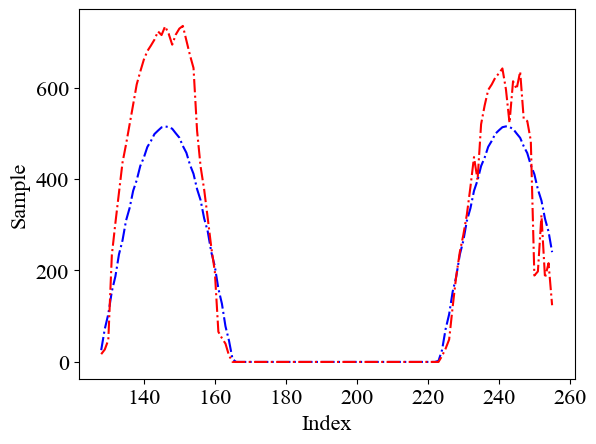

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ori_data["nwp_globalirrad"][128:256], 'b-.')
plt.plot(ori_data["lmd_totalirrad"][128:256],  'r-.')

plt.ylabel('Sample')
plt.xlabel('Index')

plt.show()

In [40]:
ori_data.set_index("date_time", inplace=True)

In [41]:
import pvlib
from pvlib import location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pvlib import pvsystem
# - temp_air
# - relative_humidity
# - IR(h)
# - wind_speed
# - wind_direction
# - pressure
#surface_tilt(latitude)

In [42]:
coordinates = [
    (114.95139,38.04778, 'Station1', 20000, 'UTC+8')
]
latitude, longitude, name, altitude, timezone = coordinates[0]

In [43]:
ivt_para = pvsystem.retrieve_sam('cecinverter')['Advanced_Energy_Industries__Solaron_500kW__3159500_XXXX___480V_']
ivt_para["Pdco"], ivt_para['Vdco'], ivt_para["Vdcmax"], ivt_para['Idcmax'], = 567000, 315, 1000, 1134
ivt_para["Mppt_low"], ivt_para['Mppt_high'] = 460, 950
ivt_para

Vac                          480
Pso                  1175.865112
Paco                    500000.0
Pdco                      567000
Vdco                         315
C0                          -0.0
C1                      0.000058
C2                      0.000698
C3                      0.000206
Pnt                        150.0
Vdcmax                      1000
Idcmax                      1134
Mppt_low                     460
Mppt_high                    950
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: Advanced_Energy_Industries__Solaron_500kW__3159500_XXXX___480V_, dtype: object

In [44]:
inverter

NameError: name 'inverter' is not defined

In [ ]:
station00 = pvod.read_ori_data(station_id=0)

In [ ]:
station00[:400].head(100)

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,...,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2018-08-16 00:00:00+08:00,0.0,0.0,22.78,...,1006.299988,353,1.1,0.0
1,2018-08-16 00:15:00+08:00,0.0,0.0,22.75,...,1006.200012,330,0.9,0.0
2,2018-08-16 00:30:00+08:00,0.0,0.0,22.71,...,1006.299988,1,1.9,0.0
3,2018-08-16 00:45:00+08:00,0.0,0.0,22.64,...,1006.299988,309,0.4,0.0
4,2018-08-16 01:00:00+08:00,0.0,0.0,22.57,...,1006.299988,335,1.6,0.0
...,...,...,...,...,...,...,...,...,...
95,2018-08-16 23:45:00+08:00,0.0,0.0,21.42,...,1008.400024,194,0.0,0.0
96,2018-08-17 00:00:00+08:00,0.0,0.0,20.94,...,1008.299988,155,0.0,0.0
97,2018-08-17 00:15:00+08:00,0.0,0.0,20.91,...,1008.200012,146,0.3,0.0
98,2018-08-17 00:30:00+08:00,0.0,0.0,20.91,...,1008.099976,96,0.0,0.0


In [ ]:
station05 = pvod.read_ori_data(station_id=5)
station05[['nwp_globalirrad', 'lmd_totalirrad', 'power']][:200]

,nwp_globalirrad,lmd_totalirrad,power
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
195,0.0,0,0.0
196,0.0,0,0.0
197,0.0,0,0.0
198,0.0,0,0.0


In [ ]:
# select data within date range 
pd.set_option('display.max_columns', 4)

t1 = '2019/3/05 08:30'
t2 = '2019/5/20 17:00'
slice_data = pvod.select_daterange(station_id=5, start_date=t1, end_date=t2)
slice_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,...,lmd_pressure,lmd_winddirection,lmd_windspeed,power
34,2019-03-05 08:30:00+08:00,255.72,219.52,9.71,...,994.400024,211,1.5,0.00000
35,2019-03-05 08:45:00+08:00,312.05,272.84,10.50,...,994.500000,212,0.4,0.00000
36,2019-03-05 09:00:00+08:00,348.63,307.68,11.09,...,994.500000,208,0.7,0.00000
37,2019-03-05 09:15:00+08:00,401.60,358.34,11.62,...,994.599976,209,1.1,12.92200
38,2019-03-05 09:30:00+08:00,435.36,390.76,11.98,...,994.500000,115,0.0,15.37944
...,...,...,...,...,...,...,...,...,...
7360,2019-05-20 16:00:00+08:00,602.98,554.91,27.31,...,984.599976,33,3.3,18.14094
7361,2019-05-20 16:15:00+08:00,551.86,505.30,27.26,...,984.500000,33,3.9,16.38525
7362,2019-05-20 16:30:00+08:00,516.56,471.12,27.23,...,984.400024,33,1.4,14.43706
7363,2019-05-20 16:45:00+08:00,462.04,418.40,27.16,...,984.400024,41,4.1,12.47291


In [ ]:
# data intersection between 2 PV stations
start, end = pvod.date_intersection(station_id_a=3, station_id_b=9)
start, end

Station_3   : start: 2019-01-12 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00
Station_9   : start: 2018-09-26 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00
intersection: start: 2019-01-12 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00


(Timestamp('2019-01-12 00:00:00+0800', tz='Asia/Shanghai'),
 Timestamp('2019-06-13 23:45:00+0800', tz='Asia/Shanghai'))

In [ ]:
ori_data = pvod.read_ori_data(station_id=3)
ori_data
train_data, test_data = pvod.split_data(xy=ori_data, mode="end_order", ratio=0.8)
print(f"train :\n {train_data} \n=========================\
        test:\n {test_data}, \n\=========================\
        len_train: {len(train_data)}, len_test: {len(test_data)}")

train :
                       date_time  nwp_globalirrad  nwp_directirrad  \
0     2019-01-12 00:00:00+08:00             0.00             0.00   
1     2019-01-12 00:15:00+08:00             0.00             0.00   
2     2019-01-12 00:30:00+08:00             0.00             0.00   
3     2019-01-12 00:45:00+08:00             0.00             0.00   
4     2019-01-12 01:00:00+08:00             0.00             0.00   
...                         ...              ...              ...   
11745 2019-05-14 08:15:00+08:00           498.38           453.51   
11746 2019-05-14 08:30:00+08:00           532.70           486.76   
11747 2019-05-14 08:45:00+08:00           581.54           534.18   
11748 2019-05-14 09:00:00+08:00           609.95           561.95   
11749 2019-05-14 09:15:00+08:00           647.76           599.06   

       nwp_temperature  ...  lmd_pressure  lmd_winddirection  lmd_windspeed  \
0                -0.07  ...    988.500000                 48            1.0   
1   

<>:6: SyntaxWarning: invalid escape sequence '\='
<>:6: SyntaxWarning: invalid escape sequence '\='
C:\Users\naoki\AppData\Local\Temp\ipykernel_8520\478584067.py:6: SyntaxWarning: invalid escape sequence '\='
  len_train: {len(train_data)}, len_test: {len(test_data)}")


In [ ]:
users_func = UDFClass()
users_func.calcuate(station_id=1, param0='Panel_Size', param1='Panel_Number')
users_func.get_id_metedata(1)

Welcome to PVODataset (PVOD).
area = 123099.0 m^2.


Station_ID                                               station01
Capacity                                                     20000
PV_Technology                                              Poly-Si
Panel_Size                                                  1.6635
Module           products types:LW6P60-270\r\nPmax:270 Wp\r\nVm...
Inverters        products types:TC500KH\r\nMax. DC input:618 kW...
Layout           modules per string:22\r\nstrings per inverter:128
Panel_Number                                                 74000
Array_Tilt                                               South 33°
Pyranometer      GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...
Longitude                                                117.45722
Latitude                                                  38.18306
Name: 1, dtype: object

In [ ]:
ori_data.keys()

Index(['date_time', 'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature',
       'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure',
       'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power'],
      dtype='object')

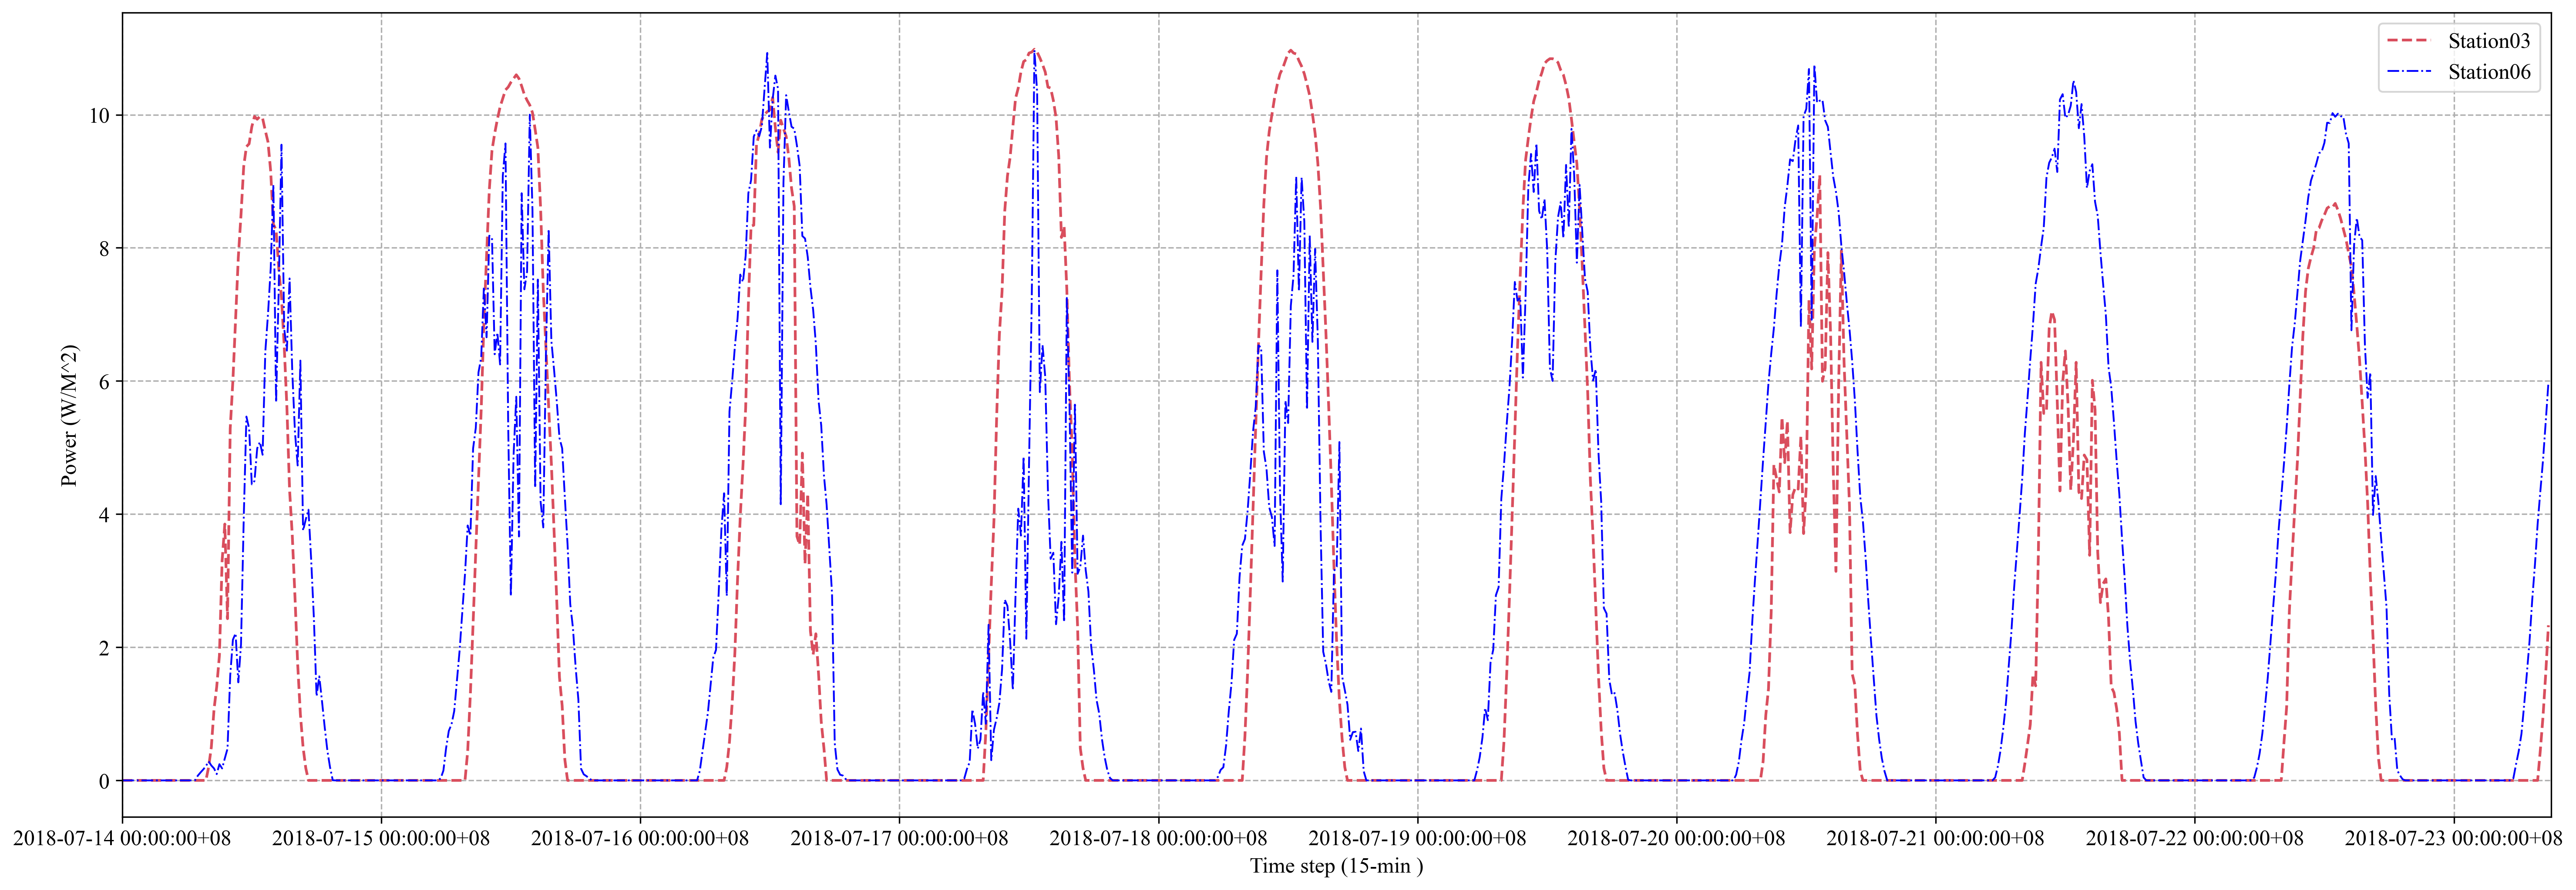

In [ ]:
ori_data0 = pvod.read_ori_data(3)
ori_data2 = pvod.read_ori_data(6)
start, end = 0, 900
datet = ori_data2["date_time"][start:end]
datet = [str(i)[:-3] for i in datet]
tmp_t = [datet[i] for i in list(range(start,end,96))]

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(24,8),dpi=300)

fs = 12



line0, = plt.plot(ori_data0["power"][start:end], color='#D94E5D', linestyle='--')
line1, = plt.plot(ori_data2["power"][start:end], color='blue', linestyle='-.', linewidth=1)

plt.legend(handles=[line0, line1], labels=['Station03','Station06'], loc='upper right',fontsize=fs)
plt.xticks(list(range(start,end,96)), tmp_t)
# plt.ylim(0.5,1)

plt.grid(ls='--')
plt.xlim(0,end)
plt.yticks(size = fs)
plt.xticks(size = fs)
plt.ylabel('Power (W/M^2)',fontsize=fs)
plt.xlabel('Time step (15-min )',fontsize=fs)
plt.savefig('./power.pdf',bbox_inches='tight',format='pdf')
plt.show()


In [ ]:
# load PV output Dataset after QC
pvod2 = PVODataset(path="../datasets/",timezone="UTC+8", qc=True)


Welcome to PVODataset (PVOD).
Quality control is set to True.


In [ ]:
pvod2.info()

In [ ]:
import pvlib
from pvlib import location
from pvlib import pvsystem
from pvlib.pvsystem import PVSystem
from pvlib import modelchain
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS


from pvodataset import PVODataset, UDFClass, QCfunc
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pvod = PVODataset(path="../datasets/",timezone="UTC+8")
meta_data = pvod.read_metadata()
ori_data_0 = pvod.read_ori_data(station_id=8)
ori_data_0.set_index("date_time", inplace=True)



Welcome to PVODataset (PVOD).


In [ ]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

module_parameters = pvsystem.retrieve_sam('CECMod')['Yingli_Energy__China__YL250P_29b']

ivt_para = pvsystem.retrieve_sam('cecinverter')['Advanced_Energy_Industries__Solaron_500kW__3159500_XXXX___480V_']
ivt_para["Pdco"], ivt_para['Vdco'], ivt_para["Vdcmax"], ivt_para['Idcmax'], = 567000, 315, 1000, 1134
ivt_para["Mppt_low"], ivt_para['Mppt_high'] = 460, 950
inverter_parameters = ivt_para

lat, lon = 38.047780, 114.951390
site = location.Location(lat, lon, tz='UTC')

In [ ]:
system = PVSystem(surface_tilt=33, surface_azimuth=180,
                          module_parameters=module_parameters,
                          inverter_parameters=inverter_parameters,
                          modules_per_string=20, strings_per_inverter=100,
                          temperature_model_parameters=temperature_model_parameters)

In [ ]:
mc = ModelChain(system, site, transposition_model='perez',
                        solar_position_method='nrel_numpy',
                        aoi_model='physical', spectral_model='no_loss')

irradiance_df = ori_data_0[['nwp_directirrad', 'nwp_globalirrad', 'lmd_diffuseirrad']]


ori_data_0 = ori_data_0.rename(columns={
    'nwp_directirrad': 'dni',
    'nwp_globalirrad': 'ghi',
    'nwp_globalirrad': 'dhi'
})

KeyError: "['nwp_directirrad', 'nwp_globalirrad'] not in index"

In [ ]:

dni = pvlib.irradiance.beam_component(
    solar_zenith=weather['zenith'],
    solar_azimuth=weather['azimuth'],
    surface_tilt=33,
    surface_azimuth=surface_azimuth,
    dhi=0,  # Use DHI if available
    dni_extra=pvlib.irradiance.get_extra_radiation(weather.index)
)

NameError: name 'weather' is not defined

In [27]:
results = mc.run_model(weather = ori_data_0)
all_ac = results.results.ac




ValueError: Incomplete input data. Data needs to contain ['ghi', 'dni', 'dhi']. Detected data contains: ['dhi', 'dni', 'nwp_temperature', 'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure', 'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure', 'lmd_winddirection', 'lmd_windspeed', 'power']

# Heatmap of all the Features

In [28]:
all_ac = all_ac.reset_index(drop=True)
all_ac 

0       -150.0
1       -150.0
2       -150.0
3       -150.0
4       -150.0
         ...  
33115   -150.0
33116   -150.0
33117   -150.0
33118   -150.0
33119   -150.0
Length: 33120, dtype: float64

In [29]:
from pvodataset import PVODataset
import pandas as pd

pvod = PVODataset(path="../datasets/",timezone="UTC+8")
ori_data = pvod.read_ori_data(station_id=8)
ori_data = ori_data.drop(columns='date_time')

ori_data['ac_output'] = all_ac

Welcome to PVODataset (PVOD).


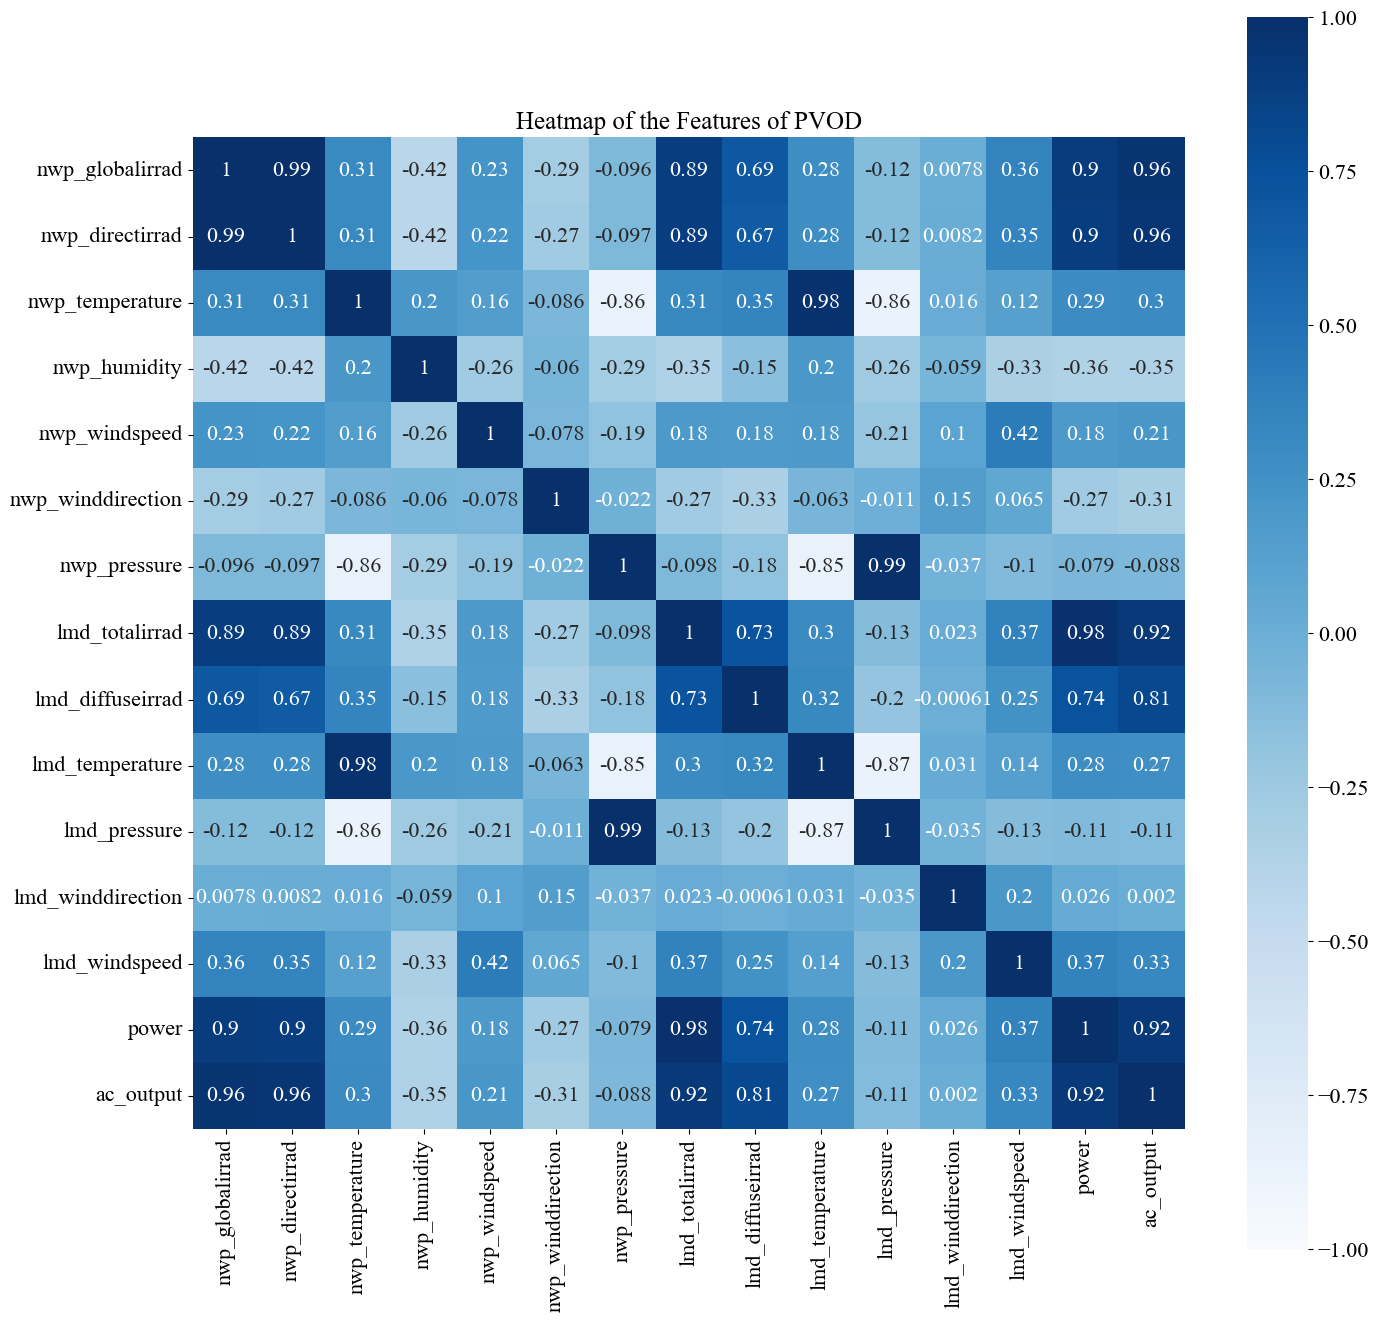

In [30]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.subplots(figsize=(16, 16))
plt.rc('font',family='Times New Roman',size=16)

sns.heatmap(ori_data.corr(), center=0, annot=True, vmax=1.0, vmin=-1,square = True,cmap="Blues")
plt.title("Heatmap of the Features of PVOD", fontsize = 18)
# plt.savefig( 'corr.pdf', bbox_inches='tight',format='pdf')
plt.savefig( 'corr.png', bbox_inches='tight')

plt.show()

# Station 0
nwp_global irrad .97
lmd_totalirrad .94
pvlib .94


# station 1
nwp_global irrad .95
lmd_totalirrad .92
pvlib .91

# station 2 




